# 1. Contextualização 

O dataset Telco Customer Churn contêm informações sobre uma empresa fictícia de telecomunicações que forneceu serviços de telefone residencial e Internet para 7043 clientes na Califórnia no terceiro trimestre. Eles indicam quais clientes deixaram, permaneceram ou se inscreveram para os seus serviços. Os dados podem ser encontrados no [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data) e foram disponibilizados por [BlastChar](https://www.kaggle.com/blastchar).

### Features
|Coluna|Descrição|
|---|---|
|customerID|Identificador único dos clientes|
|gender|Gênero|
|SeniorCitizen|É idoso?|
|Partner|Possui parceiro?|
|Dependents|Possui dependentes?|
|tenure|Tempo de relacionamento (em meses)|
|PhoneService|Possui serviço telefonico?|
|MultipleLines|Possui multiplas linhas?(Sim, não, não possui serviço telefonico)|
|InternetService|Provedor de serviços de internet (DSL, Fibra ou não)|
|OnlineSecurity|Possui seguro online?|
|OnlineBackup|Possui backup online?|
|DeviceProtection|Possui proteção do dispositivo?|
|TechSupport|Tem suporte técnico?|
|StreamingTV|Possui streaming de TV?|
|StreamingMovies|Possui streaming de Filmes?|
|Contract|Tipo de contrato(mês-a-mês, anual ou bi-anual)|
|PaperlessBilling|Recebe boletos?|
|PaymentMethod|Método de pagamento|
|MonthlyCharges|Taxa de serviço|
|TotalCharges|Total pago pelo cliente|
|Churn|Churn?|

## 1.1. Metas e objetivos

Este projeto tem o intuíto de realizar uma breve análise exploratória e construir um modelo de Machine Learning para predição de Churn.

# 2. Preparação do ambiente
## 2.1. Importação das bibliotecas e carregamento dos dados

In [179]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

# Configurações do notebook
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')
sns.set_palette('Paired')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

In [180]:
df = pd.read_csv("../data/raw/telcocustomerchurn.csv")

## 2.2. Qualidade dos dados

In [181]:
print(f"Dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

Dataset possui 7043 linhas e 21 colunas.


In [182]:
print(f"O dataset possui: {len(df.select_dtypes(include = 'object').columns.to_list())} colunas categóricas.")
print(f"O dataset possui: {len(df.select_dtypes(include = 'number').columns.to_list())} colunas numéricas.")

O dataset possui: 18 colunas categóricas.
O dataset possui: 3 colunas numéricas.


In [183]:
for col in df.columns.to_list():
    print(df[col].name)
    print(df[col].unique())
    print("=" * 30)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [184]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Algumas observações

- Vejo a necessidade de fazer algum tratamento nas colunas que deveriam ser binárias para a modelagem, já que a informação de "No internet service" é o mesmo que No.
- ``TotalCharges`` precisa ser convertido para o dtype correto.
- O dataset aparenta não apresentar dados nulos.

In [186]:
# Convertendo o dtype de TotalCharges

df.TotalCharges = df.TotalCharges.replace(' ', np.nan)
df.TotalCharges = df.TotalCharges.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 3. Exploratory Data Analysis

## 3.1. Estatísticas descritivas

In [187]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7032.0,2283.30,2266.77,18.80,401.45,1397.48,3794.74,8684.80


- Existe uma baixa quantidade de clientes idosos.
- Na média os clientes estão cadastrados a mais de 2 anos.
- A média dos serviços do preço dos serviços é de 64,76 USD.

## 3.2. Dados nulos

In [188]:
missing = df.isnull().sum().reset_index()
missing.rename(columns = {'index': 'Coluna', 0: 'Nulos'}, inplace = True)
missing[missing['Nulos'] > 0]

,Coluna,Nulos
19,TotalCharges,11


Existem 11 nulos em ``TotalCharges``, a estratégia de imputação será a mediana.

## 3.3. Comportamento do target

In [189]:
churn_proportion = df.Churn.value_counts(normalize = True).reset_index()
churn_proportion['proportion'] = round((churn_proportion['proportion'] * 100), 2)
churn_proportion

,Churn,proportion
0,No,73.46
1,Yes,26.54


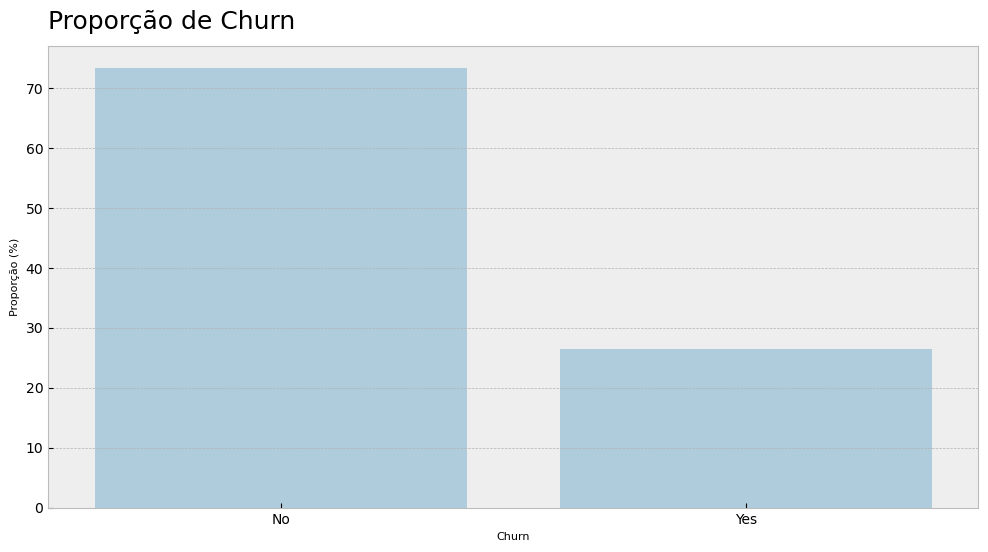

In [190]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(churn_proportion, x = 'Churn', y = 'proportion')
ax.set_title("Proporção de Churn", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Churn", fontsize = 8)
ax.set_ylabel("Proporção (%)", fontsize = 8)
plt.show()

Uma taxa de 26,54% de churn é bastante alta, é necessário buscar compreender os fatores que levam a isso. 

### Target x Features

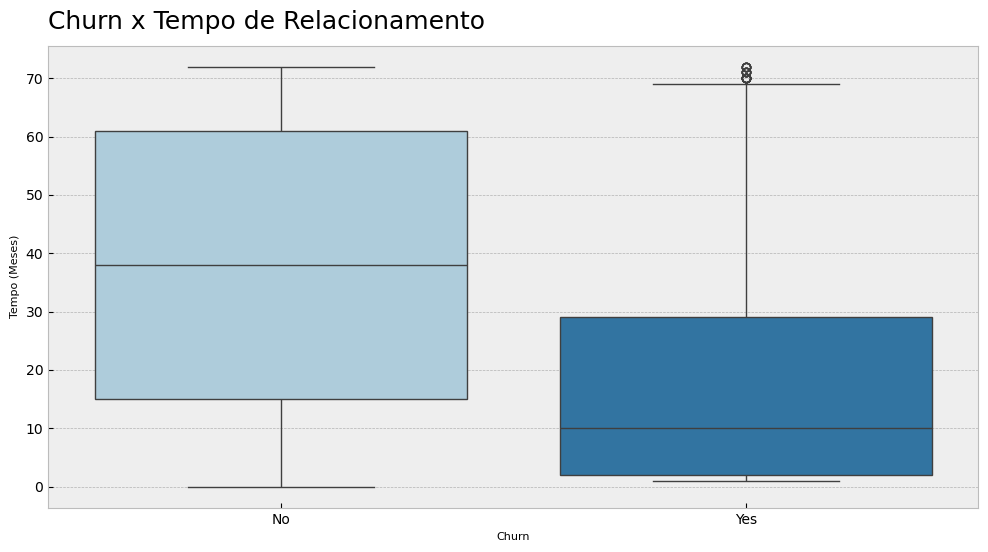

In [191]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.boxplot(df, x = 'Churn', y = 'tenure', palette='Paired')
ax.set_title("Churn x Tempo de Relacionamento", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Churn", fontsize = 8)
ax.set_ylabel("Tempo (Meses)", fontsize = 8)
plt.show()

Pessoas com menor temmpo de relacionamento com Telcom tem maior tendência de churn.

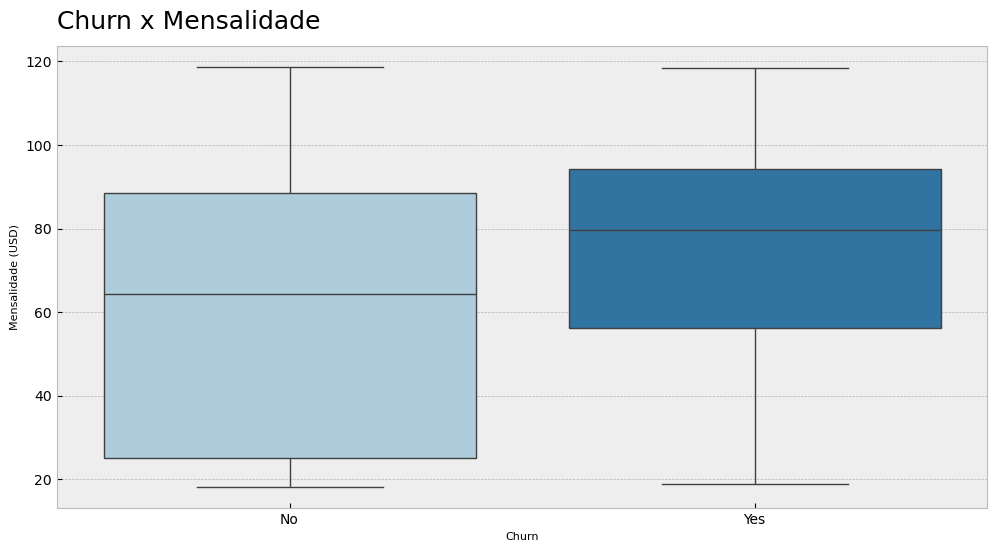

In [192]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.boxplot(df, x = 'Churn', y = 'MonthlyCharges', palette='Paired')
ax.set_title("Churn x Mensalidade", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Churn", fontsize = 8)
ax.set_ylabel("Mensalidade (USD)", fontsize = 8)
plt.show()

Pessoas que pagam taxas de serviço maiores tem maior tendência de churn, vamos observar o panorama de total do valor gerado.

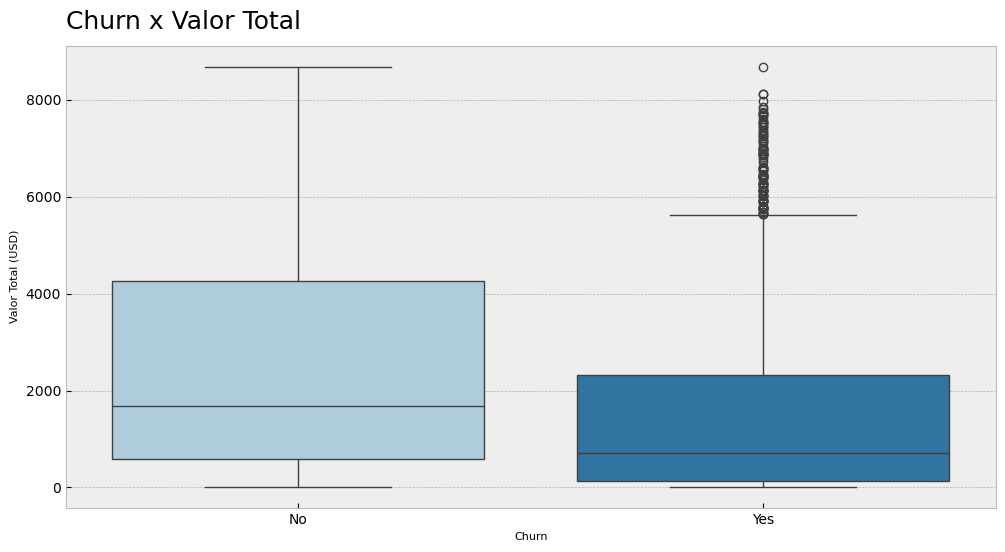

In [193]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.boxplot(df, x = 'Churn', y = 'TotalCharges', palette='Paired')
ax.set_title("Churn x Valor Total", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Churn", fontsize = 8)
ax.set_ylabel("Valor Total (USD)", fontsize = 8)
plt.show()

Vamos observar também em relação ao tipo de contrato.

In [194]:
contract_churn = df.groupby(['Churn', 'Contract']).agg(Contagem = ('Churn', 'count')).reset_index()
contract_churn

,Churn,Contract,Contagem
0,No,Month-to-month,2220
1,No,One year,1307
2,No,Two year,1647
3,Yes,Month-to-month,1655
4,Yes,One year,166
5,Yes,Two year,48


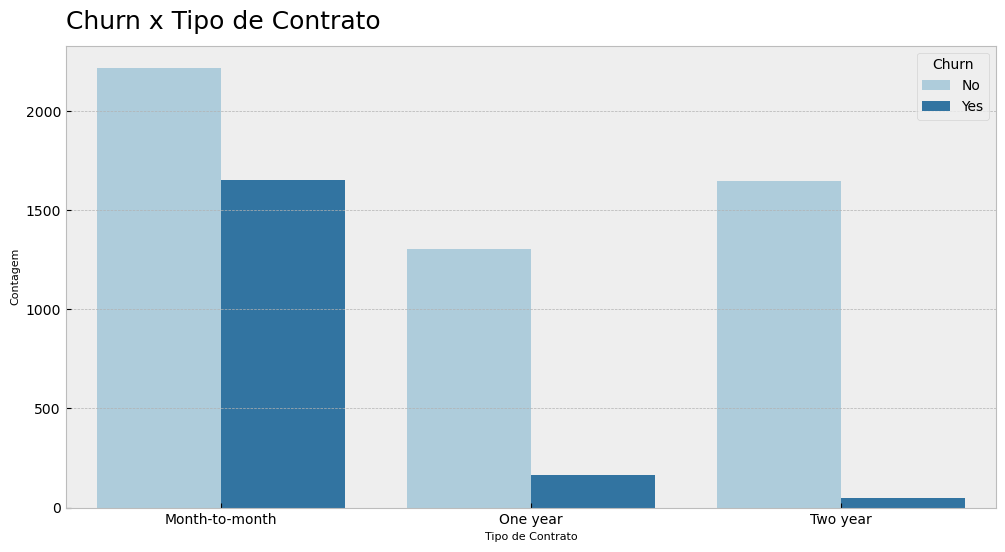

In [195]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(contract_churn, x = 'Contract', y = 'Contagem', hue = 'Churn')
ax.set_title("Churn x Tipo de Contrato", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Tipo de Contrato", fontsize = 8)
ax.set_ylabel("Contagem", fontsize = 8)
plt.show()

Comparado aos outros tipos de contrato, existe maior volume de churn nos contratos mês-a-mês. 

In [196]:
pay_churn = df.groupby(['PaymentMethod', 'Churn']).agg(Contagem = ('Churn', 'count')).reset_index()
pay_churn

,PaymentMethod,Churn,Contagem
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


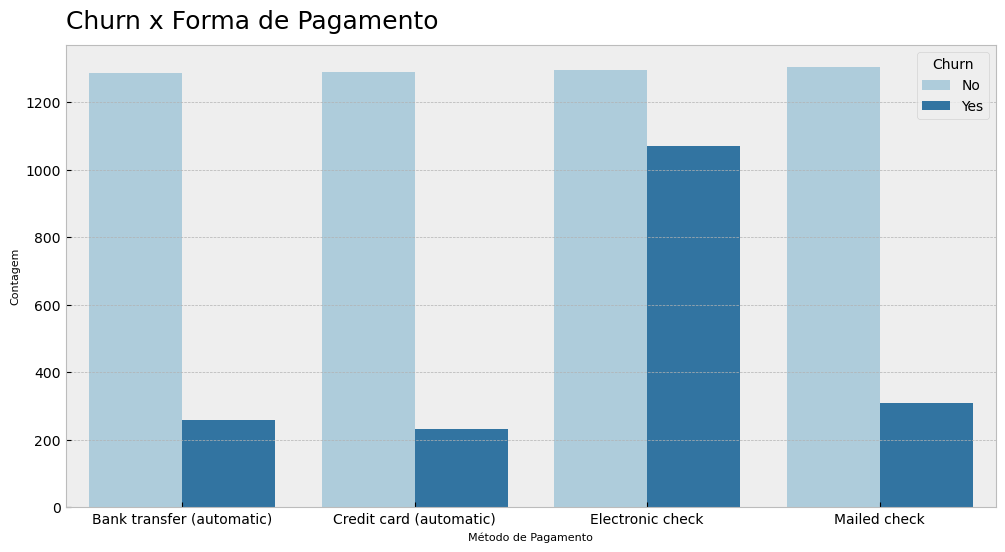

In [197]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(pay_churn, x = 'PaymentMethod', y = 'Contagem', hue = 'Churn')
ax.set_title("Churn x Forma de Pagamento", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Método de Pagamento", fontsize = 8)
ax.set_ylabel("Contagem", fontsize = 8)
plt.show()

Formas automáticas de pagamento tem uma tendência menor de churn, o 'Electronic check' tem um volume muito alto de churn comparado ao restante.

In [198]:
support_churn = df.groupby(['TechSupport', 'Churn']).agg(Contagem = ('Churn', 'count')).reset_index()
support_churn

,TechSupport,Churn,Contagem
0,No,No,2027
1,No,Yes,1446
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1734
5,Yes,Yes,310


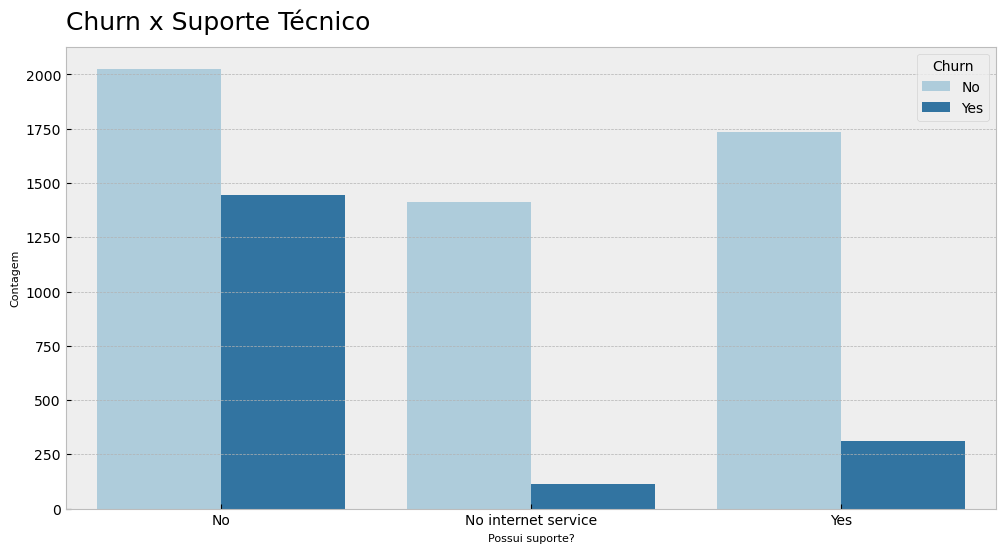

In [199]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(support_churn, x = 'TechSupport', y = 'Contagem', hue = 'Churn')
ax.set_title("Churn x Suporte Técnico", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Possui suporte?", fontsize = 8)
ax.set_ylabel("Contagem", fontsize = 8)
plt.show()

A falta de suporte técnico também causa churn. 

# 4. Prepapração dos dados

## 4.1. Seleção das features

In [200]:
features = df.drop(columns = ['customerID', 'Churn'], axis = 1).columns.to_list()
target = 'Churn'

cat_features = df[features].select_dtypes(include = 'object').columns.to_list()
num_features = df[features].select_dtypes(include = 'number').columns.to_list()

In [201]:
# Usando o LabelEncoder para transformar o target

le = LabelEncoder()
df[target] = le.fit_transform(df[target])

## 4.2. Divisão dos dados em treino e teste

In [202]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [203]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 19) (1409, 19) (5634,) (1409,)


In [204]:
print(f"Taxa de resposta em treino: {y_train.mean()}")
print(f"Taxa de resposta em teste: {y_test.mean()}")

Taxa de resposta em treino: 0.2653532126375577
Taxa de resposta em teste: 0.2654364797728886


## 4.3. Definindo o pré-processamento

In [205]:
num_transformer = Pipeline([
    ('imput', MeanMedianImputer(imputation_method='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imput', CategoricalImputer(imputation_method='frequent')),
    ('ohe', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# 5. Seleção do modelo

## 5.1. Treinamento e avaliação de métricas

### Modelo 1 - RandomForestClassifier

In [206]:
model = RandomForestClassifier()

rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imput',
                                                                   MeanMedianImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imput',
                                                                   CategoricalImputer(imputation_method='frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', RandomForestClassifier())])

In [207]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

y_proba_train = rf.predict_proba(X_train)
y_proba_test = rf.predict_proba(X_test)

#### Métricas

In [208]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

auc_train = roc_auc_score(y_train, y_proba_train[:,1])
auc_test = roc_auc_score(y_test, y_proba_test[:,1])

In [209]:
print("Métricas do RandomForestClassifier")
print("=" * 45)
print("Acurácia")
print(f"Em treino: {acc_train}")
print(f"Em teste: {acc_test}")
print(f"Diferença Treino x Teste: {acc_train - acc_test}")
print("-" * 45)
print("ROC AUC")
print(f"Em treino: {auc_train}")
print(f"Em teste: {auc_test}")
print(f"Diferença Treino x Teste: {auc_train - auc_test}")

Métricas do RandomForestClassifier
Acurácia
Em treino: 0.9980475683351083
Em teste: 0.7814052519517388
Diferença Treino x Teste: 0.2166423163833695
---------------------------------------------
ROC AUC
Em treino: 0.9999349527013214
Em teste: 0.8151695988013123
Diferença Treino x Teste: 0.18476535390000903


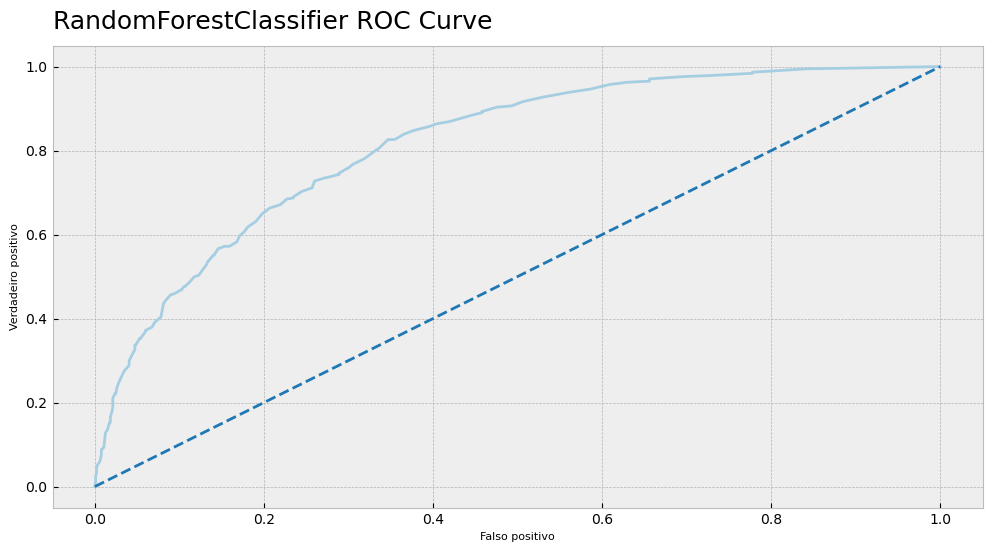

In [210]:
curve = roc_curve(y_test, y_proba_test[:,1])

fig, ax = plt.subplots(figsize = (12, 6))
plt.plot(curve[0], curve[1])
plt.plot([0, 1], [0, 1], '--')
ax.set_title('RandomForestClassifier ROC Curve', loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel('Falso positivo', fontsize = 8)
ax.set_ylabel('Verdadeiro positivo', fontsize = 8)
plt.show()

### Modelo 2 - LogisticRegression

In [221]:
model = LogisticRegression(max_iter=1000)

lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imput',
                                                                   MeanMedianImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imput',
                                                                   CategoricalImputer(imputation_method='frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [222]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

y_proba_train = lr.predict_proba(X_train)
y_proba_test = lr.predict_proba(X_test)

#### Métricas

In [223]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

auc_train = roc_auc_score(y_train, y_proba_train[:,1])
auc_test = roc_auc_score(y_test, y_proba_test[:,1])

In [224]:
print("Métricas do LogisticRegression")
print("=" * 45)
print("Acurácia")
print(f"Em treino: {acc_train}")
print(f"Em teste: {acc_test}")
print(f"Diferença Treino x Teste: {acc_train - acc_test}")
print("-" * 45)
print("ROC AUC")
print(f"Em treino: {auc_train}")
print(f"Em teste: {auc_test}")
print(f"Diferença Treino x Teste: {auc_train - auc_test}")

Métricas do LogisticRegression
Acurácia
Em treino: 0.8059992900248492
Em teste: 0.8055358410220014
Diferença Treino x Teste: 0.00046344900284778223
---------------------------------------------
ROC AUC
Em treino: 0.8492629454224883
Em teste: 0.8418610659019866
Diferença Treino x Teste: 0.007401879520501642


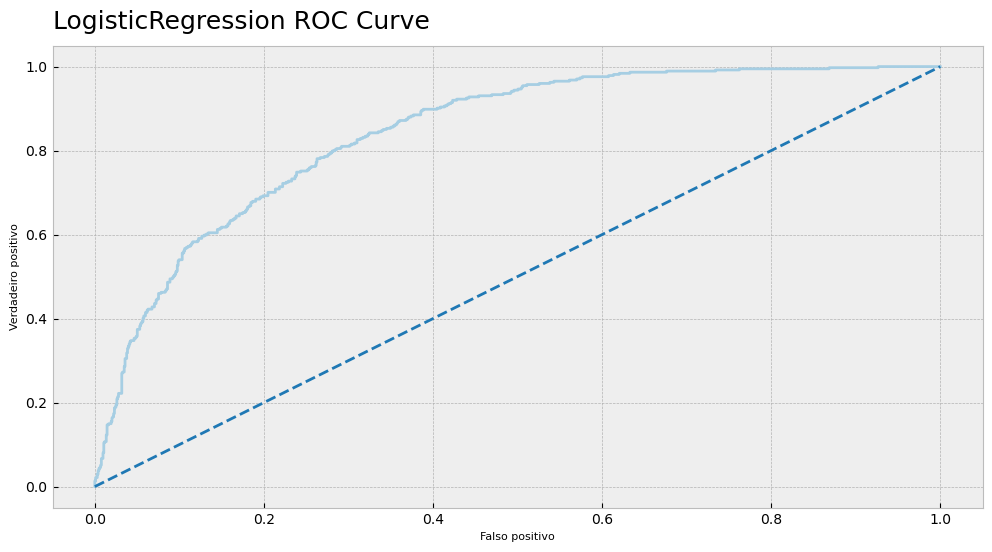

In [225]:
curve = roc_curve(y_test, y_proba_test[:,1])

fig, ax = plt.subplots(figsize = (12, 6))
plt.plot(curve[0], curve[1])
plt.plot([0, 1], [0, 1], '--')
ax.set_title('LogisticRegression ROC Curve', loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel('Falso positivo', fontsize = 8)
ax.set_ylabel('Verdadeiro positivo', fontsize = 8)
plt.show()

### Modelo 3 - XGBClassifier

In [216]:
model = XGBClassifier()

xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imput',
                                                                   MeanMedianImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imput',
                                                                   CategoricalImputer(imputation_method='frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'P...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [217]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

y_proba_train = xgb.predict_proba(X_train)
y_proba_test = xgb.predict_proba(X_test)

#### Métricas

In [218]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

auc_train = roc_auc_score(y_train, y_proba_train[:,1])
auc_test = roc_auc_score(y_test, y_proba_test[:,1])

In [219]:
print("Métricas do XGBClassifier")
print("=" * 45)
print("Acurácia")
print(f"Em treino: {acc_train}")
print(f"Em teste: {acc_test}")
print(f"Diferença Treino x Teste: {acc_train - acc_test}")
print("-" * 45)
print("ROC AUC")
print(f"Em treino: {auc_train}")
print(f"Em teste: {auc_test}")
print(f"Diferença Treino x Teste: {auc_train - auc_test}")

Métricas do XGBClassifier
Acurácia
Em treino: 0.9364572239971601
Em teste: 0.7735982966643009
Diferença Treino x Teste: 0.16285892733285923
---------------------------------------------
ROC AUC
Em treino: 0.9844419790216401
Em teste: 0.8216874628639333
Diferença Treino x Teste: 0.16275451615770675


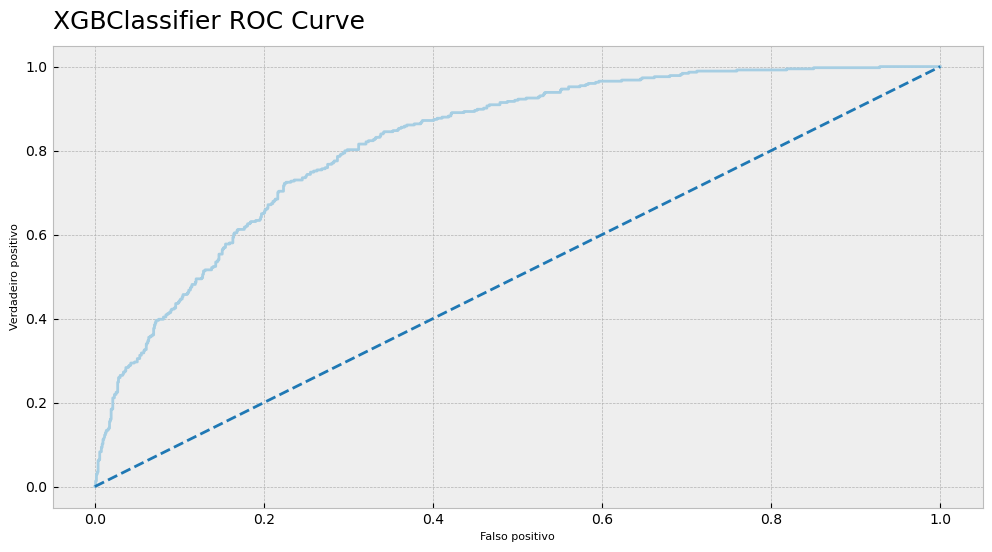

In [220]:
curve = roc_curve(y_test, y_proba_test[:,1])

fig, ax = plt.subplots(figsize = (12, 6))
plt.plot(curve[0], curve[1])
plt.plot([0, 1], [0, 1], '--')
ax.set_title('XGBClassifier ROC Curve', loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel('Falso positivo', fontsize = 8)
ax.set_ylabel('Verdadeiro positivo', fontsize = 8)
plt.show()

## 6. Conclusões

Os fatores mais importantes ligados ao Churn são os de prestação de serviço, também é possível observar que clientes novos tem maior tendência a deixar os serviços da Telco. 

### A escolha do modelo

O modelo escolhido será o LogisticRegression, já que é o que apresentou melhor desempenho levando em consideração a diferença de métricas em treino e teste, mostrando uma melhor generalização com dados novos. 